In [ ]:
! pip install tensorflow-gpu

In [1]:
!nvidia-smi

Sun Dec  6 12:52:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install fuzzy

  Created wheel for fuzzy: filename=Fuzzy-1.2.2-cp36-cp36m-linux_x86_64.whl size=160954 sha256=31b522213c1cbcbe1defeaae0758e052631ac35ca25b45b02f48369dbe9a2973
  Stored in directory: /root/.cache/pip/wheels/79/f7/14/b7e20855729780e85322529469b2d1eadfd940e83d981373cc
Successfully built fuzzy


In [3]:
from fuzzy import *
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import numpy as np

## Iris dataset

In [4]:
df = pd.read_csv('iris.data', header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
df = df[~(df['class']=='Iris-virginica')]
df.head()
df.replace(to_replace='Iris-setosa', value=0, inplace=True)
df.replace(to_replace='Iris-versicolor', value=1, inplace=True)
df = df.sample(frac=1)
X_train = df[['sepal length', 'petal length']].values
Y_train = df['class'].values
_max = np.max(X_train, axis=0)
_min = np.min(X_train, axis=0)
X_train = (X_train - _min) / (_max - _min)

X_test, Y_test = X_train[-20:], Y_train[-20:]
X_train, Y_train = X_train[:-20], Y_train[:-20]

In [5]:
X_train.shape, Y_train.shape

((80, 2), (80,))

In [6]:
clf2 = FuzzyMMC(sensitivity=1, exp_bound=0.1, animate=True)

In [7]:
clf2.fit(X_train, Y_train)

In [8]:
clf2.score(X_test, Y_test)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Total Boxes         : 16        
Points to plot      : 87        
Animation complete! Video saved at /content/fuzzy_animation.mp4


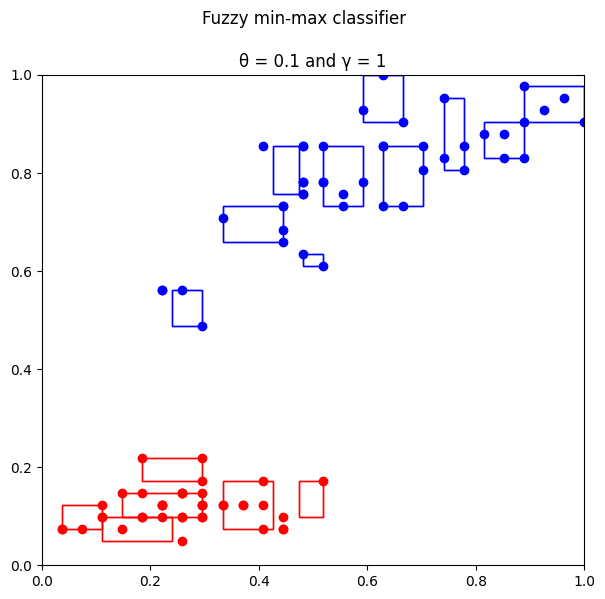

In [9]:
_ = clf2.animate()

In [10]:
import io
import base64
from IPython.display import HTML

video = io.open('/content/fuzzy_animation.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

## Generated dataset

In [11]:
def rand_uniform(x, y):
    return random.random() * (y- x) + x

def gen_circle(num_samples):
    num_samples = num_samples
    radius = 5
    points = []
    noise = 0.5
    
    def get_label(x, y):
        dist = math.sqrt(x ** 2 + y ** 2)
        return 0 if dist < radius * 0.5 else 1
    
    for i in range(num_samples//2):
        r = rand_uniform(0, radius * 0.5)
        angle = rand_uniform(0, 2 * math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = rand_uniform((-1)*radius, radius) * noise
        noiseY = rand_uniform((-1)*radius, radius) * noise
        #label = get_label(noiseX, noiseY)
        label = 0
        points.append((x, y, label))
    
    for i in range(num_samples // 2):
        r = rand_uniform(radius * 0.7, radius)
        angle = rand_uniform(0, 2 * math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = rand_uniform((-1)*radius, radius) * noise
        noiseY = rand_uniform((-1)*radius, radius) * noise
        #label = get_label(noiseX, noiseY)
        label = 1
        points.append((x, y, label))
        
    return points

In [12]:
o = gen_circle(100)
o = np.array(o)
train = pd.DataFrame(o)

In [13]:
train_x = []
train_y = []
np.random.shuffle(o)
for i in o:
    train_x.append([i[0], i[1]])
    train_y.append(i[2])

train_x = np.array(train_x)
train_y = np.array(train_y)
_max = np.max(train_x, axis=0)
_min = np.min(train_x, axis=0)
train_x = (train_x - _min) / (_max - _min)
train_x.shape, train_y.shape

((100, 2), (100,))

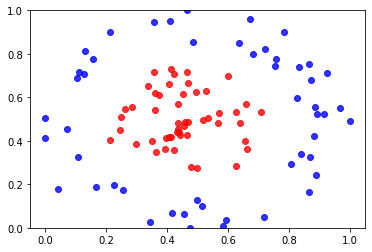

In [14]:
for x, y in zip(train_x, train_y):
    if y == 0:
        plt.scatter(x[0], x[1], c='r', alpha=0.8)
    else:
        plt.scatter(x[0], x[1], c='b', alpha=0.8)
plt.ylim([0, 1])
plt.show()

In [15]:
a = FuzzyMMC(sensitivity=1, exp_bound=0.7, animate=True)

In [16]:
a.fit(train_x, train_y)

In [17]:
a.score(train_x, train_y)

0.86

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Total Boxes         : 4         
Points to plot      : 154       
Animation complete! Video saved at /content/fuzzy_animation.mp4


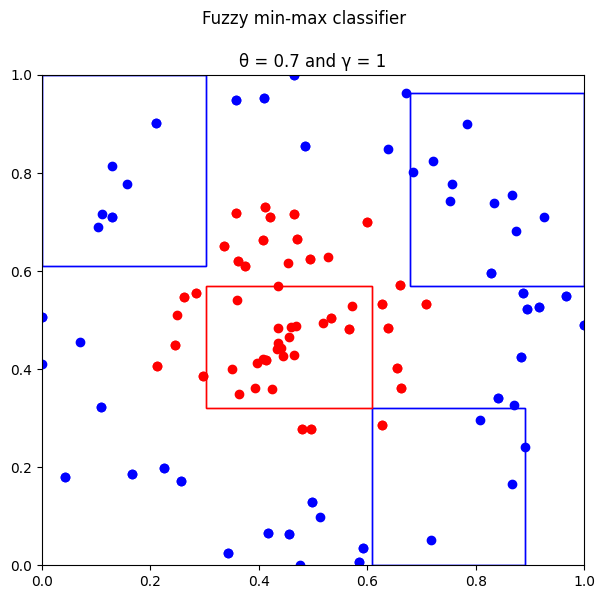

In [18]:
_ = a.animate(frame_rate=5)

In [19]:
import io
import base64
from IPython.display import HTML

video = io.open('/content/fuzzy_animation_circle.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))